<a href="https://colab.research.google.com/github/asarkar0209/AnushreeTest/blob/master/Multivariate_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [0]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
path = "/content/drive/My Drive/Colab Notebooks/haberman.csv"
df_train = pd.read_csv(path)

In [0]:
df_train.head()

,Age,Op_Year,Axil_Nodes,Surv_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


Univariate Analysis

In [0]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,27.0,34.592593,2.560938,30.0,33.5,34.0,37.0,38.0
Op_Year,27.0,61.888889,3.285555,58.0,59.5,60.0,64.0,69.0
Axil_Nodes,27.0,5.000000,7.498718,0.0,0.0,1.0,8.0,30.0
Surv_Status,27.0,1.111111,0.320256,1.0,1.0,1.0,1.0,2.0


Bivariate Analysis

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


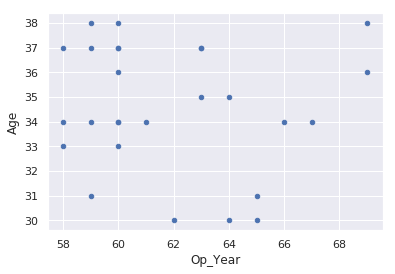

In [0]:
var = 'Op_Year'
data = pd.concat([df_train['Age'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='Age')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


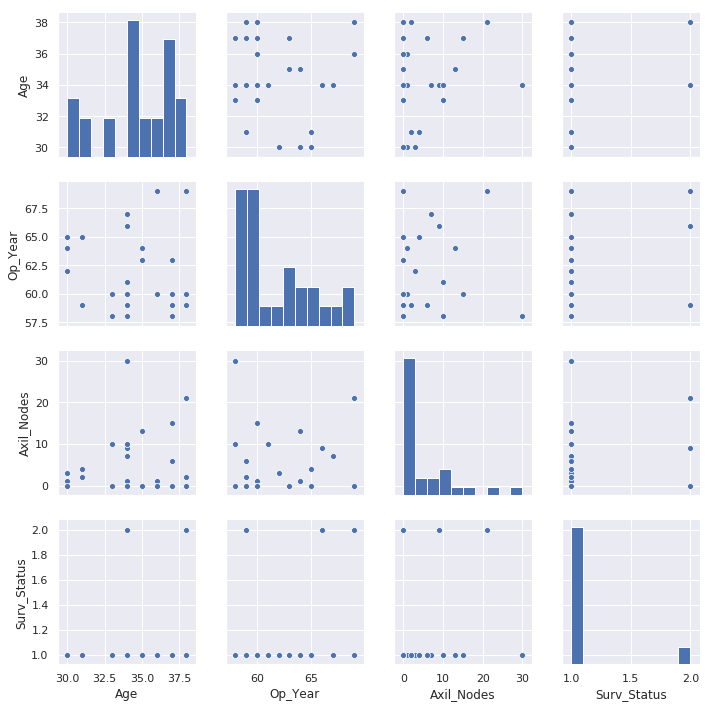

In [0]:
sns.set()
cols = ['Age', 'Op_Year', 'Axil_Nodes', 'Surv_Status']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

Multivariate Analysis

In [0]:
df_train.corr()


,Age,Op_Year,Axil_Nodes,Surv_Status
Age,1.000000,-0.083295,0.092129,0.104212
Op_Year,-0.083295,1.000000,0.060883,0.304606
Axil_Nodes,0.092129,0.060883,1.000000,0.240233
Surv_Status,0.104212,0.304606,0.240233,1.000000


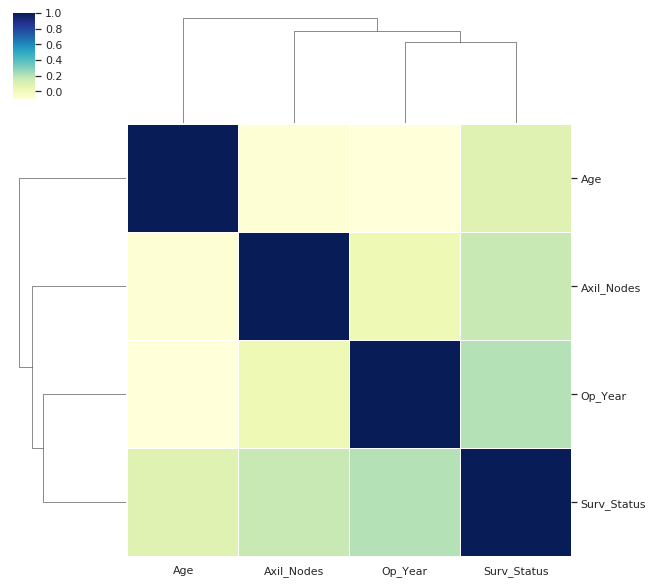

In [0]:
#Correlation Matrix

corrmat = df_train.corr(method='spearman')
cg = sns.clustermap(corrmat, cmap="YlGnBu", linewidths=0.1);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
cg

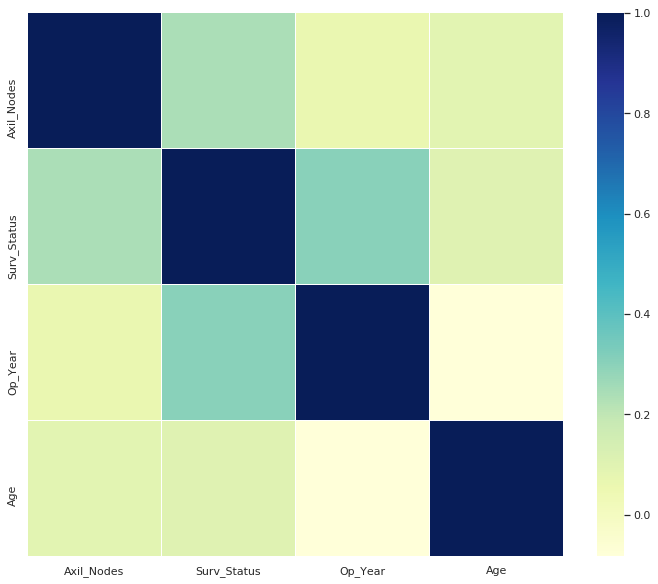

In [0]:
k = 4 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Axil_Nodes')['Axil_Nodes'].index
cm = np.corrcoef(df_train[cols].values.T)
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(cm, ax=ax, cmap="YlGnBu", linewidths=0.1, yticklabels=cols.values, xticklabels=cols.values)